In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Exploring the Dataset**

In [2]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import glob
from sklearn import cluster

In [3]:
videoDF = pd.read_csv('../input/youtube-faces-with-facial-keypoints/youtube_faces_with_keypoints_full.csv')
# videoDF.head(15)

In [4]:
# videoDF

In [5]:
# create a dictionary that maps videoIDs to full file paths
# single file cane be acessed using "../input/youtube-faces-with-facial-keypoints/youtube_faces_with_keypoints_full_1/youtube_faces_with_keypoints_full_1/AJ_Cook_0.npz"
npzFilesFullPath = glob.glob('../input/youtube-faces-with-facial-keypoints/youtube_faces_*/youtube_faces_*/*.npz')
videoIDs = [x.split('/')[-1].split('.')[0] for x in npzFilesFullPath]
fullPaths = {}
for videoID, fullPath in zip(videoIDs, npzFilesFullPath):
    fullPaths[videoID] = fullPath

# remove from the large csv file all videos that weren't uploaded yet
# videoDF = videoDF.loc[videoDF.loc[:,'videoID'].isin(fullPaths.keys()),:].reset_index(drop=True)
print('Number of Videos is %d' %(videoDF.shape[0]))
print('Number of Unique Individuals is %d' %(len(videoDF['personName'].unique())))

Number of Videos is 2194
Number of Unique Individuals is 828


In [6]:
# # overview of the contents of the dataset
# groupedByPerson = videoDF.groupby("personName")
# numVidsPerPerson = groupedByPerson.count()['videoID']
# groupedByPerson.count().sort_values('videoID', axis=0, ascending=False)
# plt.close('all')
# plt.figure(figsize=(25,20))
# plt.subplot(2,2,1)
# plt.hist(x=numVidsPerPerson,bins=0.5+np.arange(numVidsPerPerson.min()-1,numVidsPerPerson.max()+1))
# plt.title('Number of Videos per Person',fontsize=30); 
# plt.xlabel('Number of Videos',fontsize=25); plt.ylabel('Number of People',fontsize=25)

# plt.subplot(2,2,2)
# plt.hist(x=videoDF['videoDuration'],bins=28);
# plt.title('Distribution of Video Duration',fontsize=30); 
# plt.xlabel('duration [frames]',fontsize=25); plt.ylabel('Number of Videos',fontsize=25)
# plt.xlim(videoDF['videoDuration'].min()-2,videoDF['videoDuration'].max()+2)

# plt.subplot(2,2,3)
# plt.scatter(x=videoDF['imageWidth'], y=videoDF['imageHeight'])
# plt.title('Distribution of Image Sizes',fontsize=30)
# plt.xlabel('Image Width [pixels]',fontsize=25); plt.ylabel('Image Height [pixels]',fontsize=25)
# plt.xlim(0,videoDF['imageWidth'].max() +15)
# plt.ylim(0,videoDF['imageHeight'].max()+15)

# plt.subplot(2,2,4)
# averageFaceSize_withoutNaNs = np.array(videoDF['averageFaceSize'])
# averageFaceSize_withoutNaNs = averageFaceSize_withoutNaNs[np.logical_not(np.isnan(averageFaceSize_withoutNaNs))]
# plt.hist(averageFaceSize_withoutNaNs, bins=28)
# plt.title('Distribution of Average Face Sizes ',fontsize=30)
# plt.xlabel('Average Face Size [pixels]',fontsize=25); plt.ylabel('Number of Videos',fontsize=25);

In [7]:
# # show several frames from each video and overlay 2D keypoints
# np.random.seed(3)
# numVideos = 4
# framesToShowFromVideo = np.array([0.1,0.5,0.9])
# numFramesPerVideo = len(framesToShowFromVideo)

# # define which points need to be connected with a line
# jawPoints          = [ 0,17]
# rigthEyebrowPoints = [17,22]
# leftEyebrowPoints  = [22,27]
# noseRidgePoints    = [27,31]
# noseBasePoints     = [31,36]
# rightEyePoints     = [36,42]
# leftEyePoints      = [42,48]
# outerMouthPoints   = [48,60]
# innerMouthPoints   = [60,68]

# listOfAllConnectedPoints = [jawPoints,rigthEyebrowPoints,leftEyebrowPoints,
#                             noseRidgePoints,noseBasePoints,
#                             rightEyePoints,leftEyePoints,outerMouthPoints,innerMouthPoints]

# # select a random subset of 'numVideos' from the available videos
# randVideoIDs = videoDF.loc[np.random.choice(videoDF.index,size=numVideos,replace=False),'videoID']

# fig, axArray = plt.subplots(nrows=numVideos,ncols=numFramesPerVideo,figsize=(14,18))
# for i, videoID in enumerate(randVideoIDs):
# # load video
#     videoFile = np.load(fullPaths[videoID])
#     colorImages = videoFile['colorImages']
#     boundingBox = videoFile['boundingBox']
#     landmarks2D = videoFile['landmarks2D']
#     landmarks3D = videoFile['landmarks3D']

#     # select frames and show their content
#     selectedFrames = (framesToShowFromVideo*(colorImages.shape[3]-1)).astype(int)
#     for j, frameInd in enumerate(selectedFrames):
#         axArray[i][j].imshow(colorImages[:,:,:,frameInd])
#         axArray[i][j].scatter(x=landmarks2D[:,0,frameInd],y=landmarks2D[:,1,frameInd],s=9,c='r')
#         for conPts in listOfAllConnectedPoints:
#             xPts = landmarks2D[conPts[0]:conPts[-1],0,frameInd]
#             yPts = landmarks2D[conPts[0]:conPts[-1],1,frameInd]
#             axArray[i][j].plot(xPts,yPts,c='w',lw=1)
#         axArray[i][j].set_title('"%s" (t=%d)' %(videoID,frameInd), fontsize=12)
#         axArray[i][j].set_axis_off()


Without the key points -

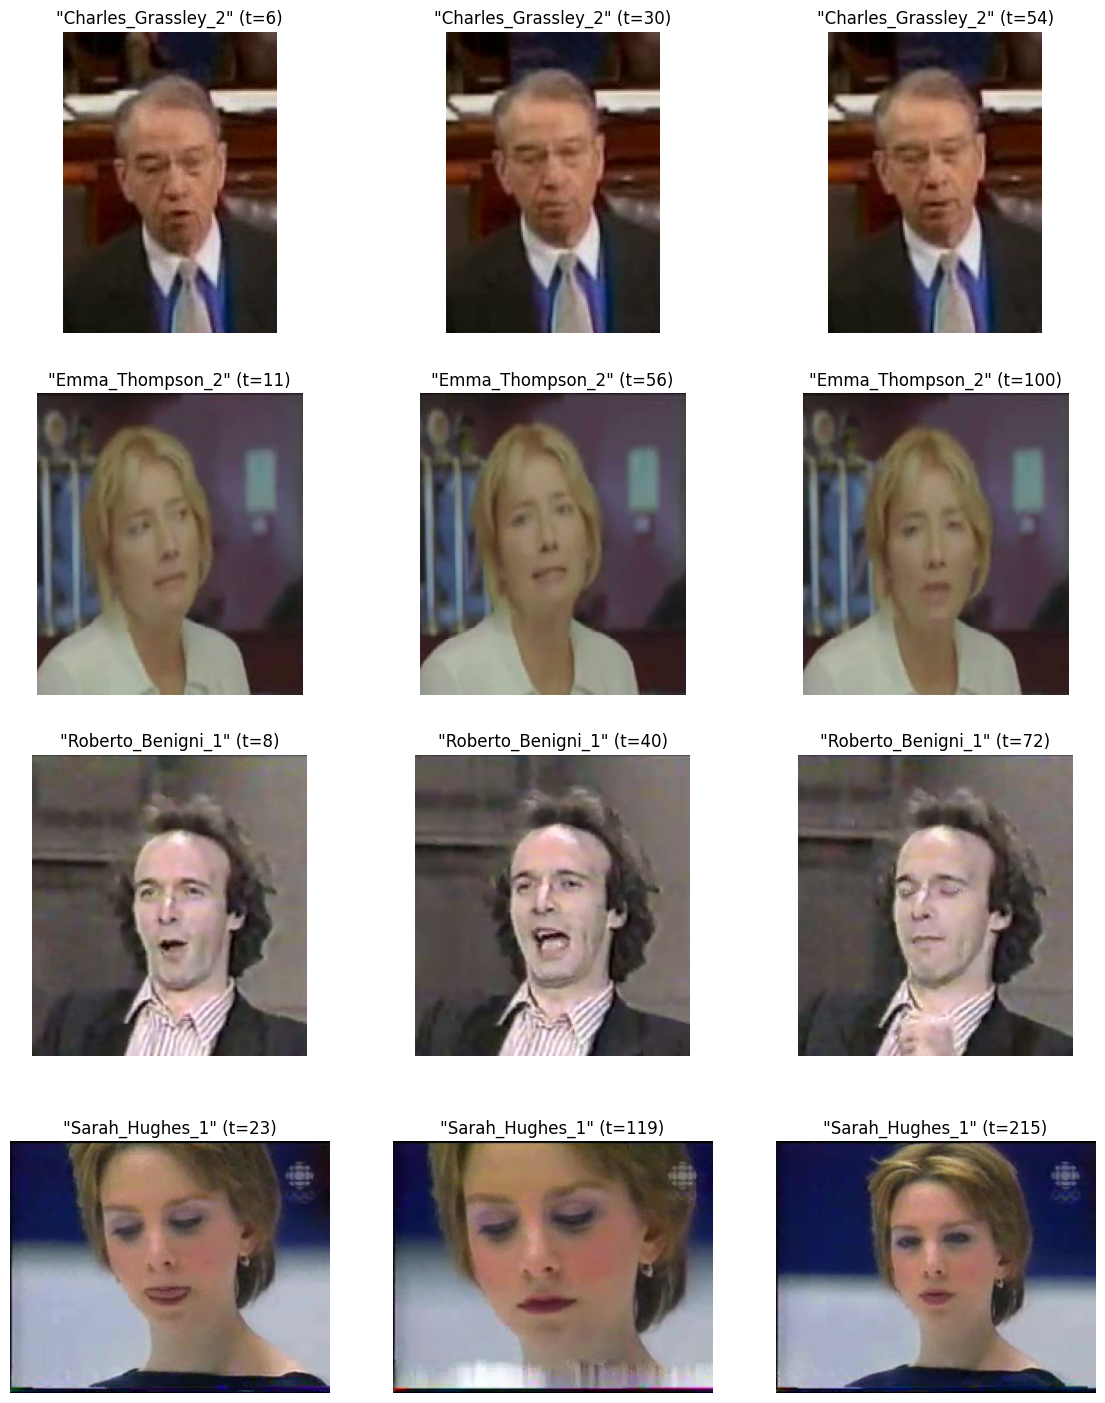

In [8]:
np.random.seed(3)
numVideos = 4
framesToShowFromVideo = np.array([0.1,0.5,0.9])
numFramesPerVideo = len(framesToShowFromVideo)

# select a random subset of 'numVideos' from the available videos
randVideoIDs = videoDF.loc[np.random.choice(videoDF.index,size=numVideos,replace=False),'videoID']

fig, axArray = plt.subplots(nrows=numVideos,ncols=numFramesPerVideo,figsize=(14,18))
for i, videoID in enumerate(randVideoIDs):
    # load video
    videoFile = np.load(fullPaths[videoID])
    colorImages = videoFile['colorImages']
    
    # select frames and show their content
    selectedFrames = (framesToShowFromVideo*(colorImages.shape[3]-1)).astype(int)
    for j, frameInd in enumerate(selectedFrames):
        axArray[i][j].imshow(colorImages[:,:,:,frameInd])
        axArray[i][j].set_title('"%s" (t=%d)' %(videoID,frameInd), fontsize=12)
        axArray[i][j].set_axis_off()


In [9]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

# #TPU->
# import torch_xla.core.xla_model as xm
# import torch_xla.distributed.parallel_loader as pl
# # Set device for TPU
# device = xm.xla_device()
# print("Using device TPU!")


# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)



Using device: cuda


In [10]:
class NumpyVideoDataset(Dataset):
    def __init__(self, video_df, full_paths, frame_buffer_size=5):
        print("Called Dataset Class and Normalising")
        self.video_df = video_df
        self.full_paths = full_paths
        self.frame_buffer_size = frame_buffer_size
        self.transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((256, 256)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
    
    def __len__(self):
        return len(self.video_df)
    
    def __getitem__(self, idx):
        video_id = self.video_df.iloc[idx]['videoID']
        video_file = np.load(self.full_paths[video_id])
        color_images = video_file['colorImages']
        
        # Randomly select a starting frame
        start_frame = np.random.randint(0, color_images.shape[3] - self.frame_buffer_size)
        
        frame_buffer = []
        for i in range(self.frame_buffer_size):
            frame = color_images[:, :, :, start_frame + i]
            frame = self.transform(frame)
            frame_buffer.append(frame)
       
        
        return torch.stack(frame_buffer), video_id

# Create dataset and dataloader
dataset = NumpyVideoDataset(videoDF, fullPaths)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Example of how to use the dataloader
for frames, video_id in dataloader:
    print(f"Video ID: {video_id[0]}")
    print(f"Frame buffer shape: {frames.shape}")
    break  # Just to show the first batch

Called Dataset Class and Normalising
Video ID: Colin_Cowie_2
Frame buffer shape: torch.Size([1, 5, 3, 256, 256])


Using device: cuda
Video ID: Ahmad_Masood_4
Frame buffer shape: torch.Size([1, 5, 3, 256, 256])


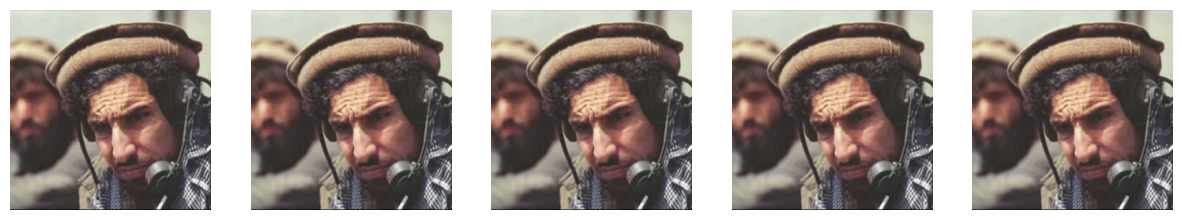

In [11]:
import torch
import matplotlib.pyplot as plt

# Define a function to unnormalize and convert tensors back to images
def unnormalize_and_convert(tensor, device):
    # Undo the normalization: mean and std used in the dataset transformation
    mean = torch.tensor([0.485, 0.456, 0.406], device=device).reshape(1, 3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225], device=device).reshape(1, 3, 1, 1)
    
    tensor = tensor * std + mean  # Unnormalize
    return tensor

# Create a function to display frames
def show_frames(frames):
    # Frames is a tensor of shape [batch_size, frame_buffer_size, 3, 256, 256]
    frames = frames.squeeze(0)  # Remove batch dimension (since batch_size=1)
    frames = unnormalize_and_convert(frames, frames.device)  # Unnormalize the frames
    
    # Convert tensor to numpy array and move to CPU
    frames = frames.permute(0, 2, 3, 1).cpu().numpy()  # Shape: [frame_buffer_size, 256, 256, 3]
    
    # Display the frames
    num_frames = frames.shape[0]
    fig, ax = plt.subplots(1, num_frames, figsize=(15, 5))
    
    for i in range(num_frames):
        ax[i].imshow(frames[i])
        ax[i].axis('off')
    
    plt.show()

# Ensure CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Example of how to use the dataloader to load and display images
for frames, video_id in dataloader:
    print(f"Video ID: {video_id[0]}")
    print(f"Frame buffer shape: {frames.shape}")
    
    # Move frames to the GPU
    frames = frames.to(device)
    
    # Show the frames
    show_frames(frames)
    
    break  # Just to show the first batch

In [12]:
class FramePreprocessor(nn.Module):
    def __init__(self):
        super(FramePreprocessor, self).__init__()
        
    def forward(self, x):
        # x shape: (batch_size, num_frames, channels, height, width)
        
        # Normalization is already done in the dataset class, so we skip it here
        
        # Ensure the input is in the correct shape and type
        x = x.float()
        
        # Rearrange dimensions for easier processing
        #x = x.permute(0, 2, 1, 3, 4)  # (batch_size, channels, num_frames, height, width)
        
        return x

#Usage
preprocessor = FramePreprocessor()

# Simulate input tensor of shape (1, 5, 3, 256, 256)
input_tensor = torch.randn(1, 5, 3, 256, 256)  # Simulated random input

# Process the input tensor
preprocessed_output = preprocessor(input_tensor)

# Check the output shape
print("Preprocessed output shape:", preprocessed_output.shape)  # Should be (1, 3, 5, 256, 256)

Preprocessed output shape: torch.Size([1, 5, 3, 256, 256])


###  x shape original: (batch_size, num_frames,channels, height, width)
### but for Conv3D, it needs shape of format (batch_size,channels, num_frames, height, width)

# MODEL 

# GSTS and Preprocessing

In [13]:


import torch
import torch.nn as nn
import numpy as np

class GSTS(nn.Module):
    def __init__(self, num_frames, num_groups=16):
        super(GSTS, self).__init__()
        self.num_frames = num_frames
        self.num_groups = num_groups
        
    def forward(self, x):
        # x shape: (batch_size, num_frames, channels, height, width)
        b, t, c, h, w = x.size()  # Adjusted the unpacking order
        #print(f"Input shape: {x.shape}")
        
        # Calculate group size
        h_group = h // int(np.sqrt(self.num_groups))
        w_group = w // int(np.sqrt(self.num_groups))
        
        # Reshape to group spatial dimensions
        x = x.view(b, t, c, int(np.sqrt(self.num_groups)), h_group, int(np.sqrt(self.num_groups)), w_group)
        #print(f"After grouping shape: {x.shape}")
        
        # Apply shifts
        out = torch.zeros_like(x)
        for i in range(t):
            if i % 2 == 0:  # Even frames: horizontal shift
                out[:, i, :, :, :, :-1, :] = x[:, i, :, :, :, 1:, :]
                out[:, i, :, :, :, -1, :] = x[:, i, :, :, :, 0, :]
            else:  # Odd frames: vertical shift
                out[:, i, :, :, :-1, :, :] = x[:, i, :, :, 1:, :, :]
                out[:, i, :, :, -1, :, :] = x[:, i, :, :, 0, :, :]
        
        # Reshape back to original dimensions
        out = out.view(b, t, c, h, w)
        #print(f"Output shape: {out.shape}")
        
        return out

# Usage
gsts = GSTS(num_frames=5)

# Placeholder FramePreprocessor class for demonstration (replace with actual implementation)
class FramePreprocessor(nn.Module):
    def __init__(self):
        super(FramePreprocessor, self).__init__()
    
    def forward(self, x):
        # x shape: (batch_size, num_frames, channels, height, width)
        
        # Normalization is already done in the dataset class, so we skip it here
        
        # Ensure the input is in the correct shape and type
        x = x.float()
        
        # Rearrange dimensions for easier processing
        #x = x.permute(0, 2, 1, 3, 4)  # (batch_size, channels, num_frames, height, width)
        
        return x

# Combine preprocessing and GSTS
class PreprocessAndGSTS(nn.Module):
    def __init__(self, num_frames, num_groups=16):
        super(PreprocessAndGSTS, self).__init__()
        self.preprocessor = FramePreprocessor()
        self.gsts = GSTS(num_frames, num_groups)
        print("Preprocessing and GSTS....")
    
    
    def forward(self, x):
        x = self.preprocessor(x)
        x = self.gsts(x)
        return x

# Usage
preprocess_and_gsts = PreprocessAndGSTS(num_frames=5)

# # Example usage with the dataloader
# # Assuming dataloader provides input in the required format [batch_size, num_frames, channels, height, width]
# for frames, video_id in dataloader:
#     print(f"Original frames shape: {frames.shape}")
#     processed_frames = preprocess_and_gsts(frames)
#     print(f"Final processed frames shape: {processed_frames.shape}")
#     break  # Just to show the first batch

Preprocessing and GSTS....


## Output of GSTS and preprocessing

Original frames shape: torch.Size([1, 5, 3, 256, 256])


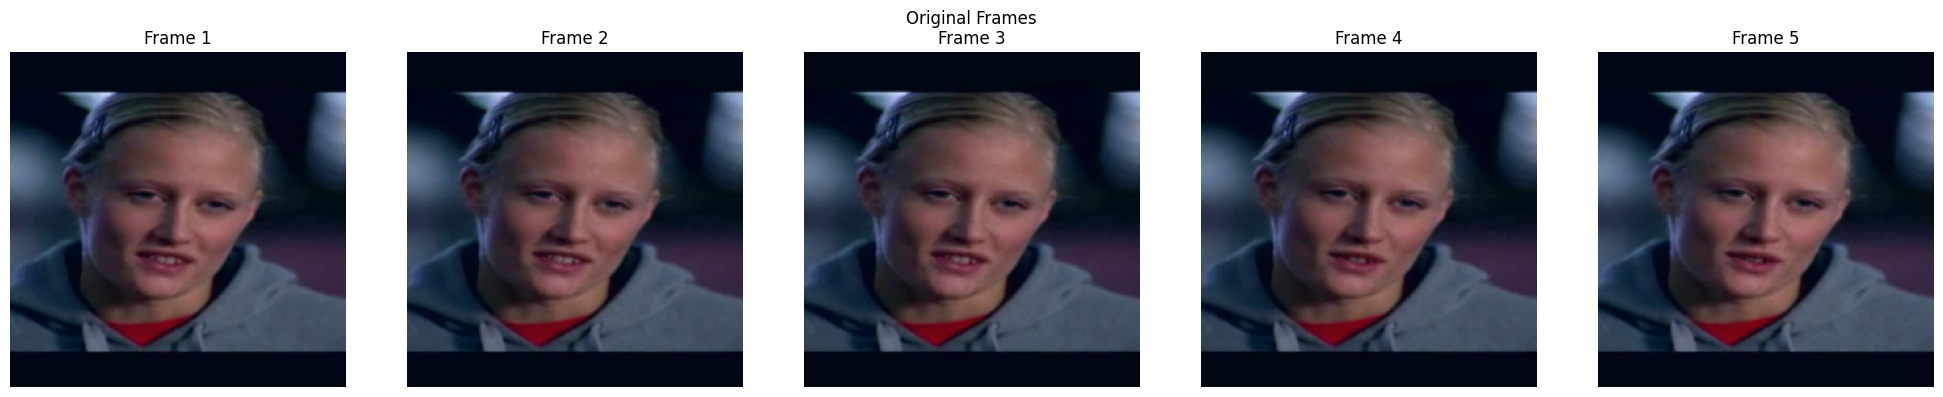

Processed frames shape: torch.Size([1, 5, 3, 256, 256])


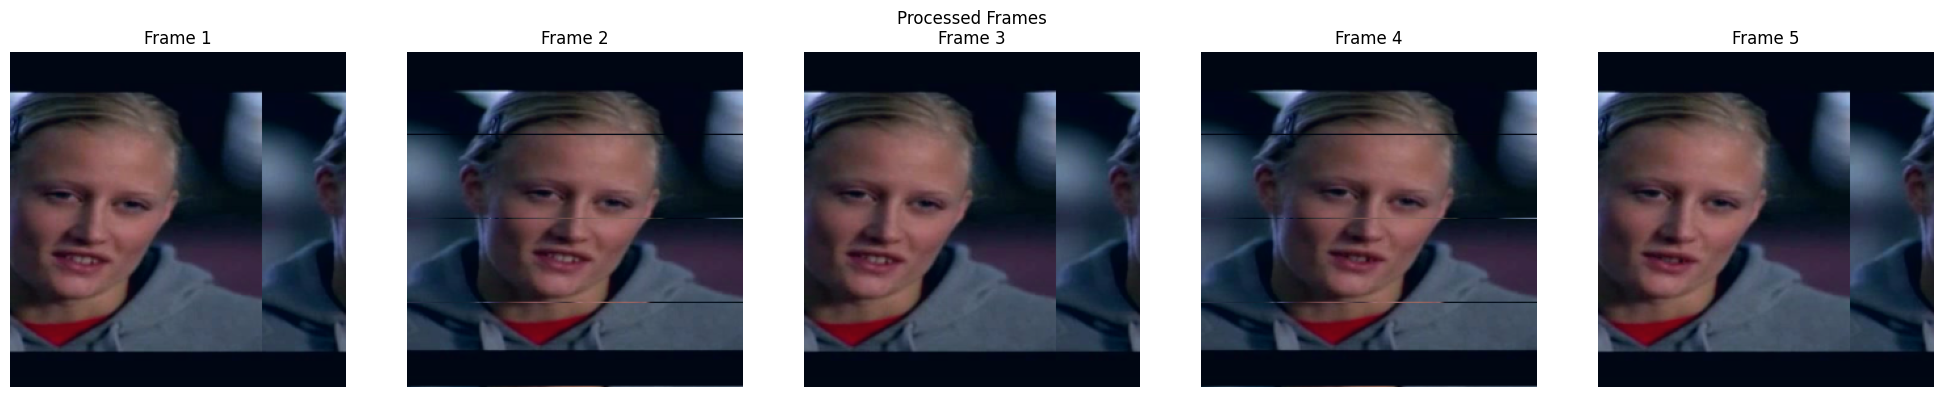

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def show_frames(frames, title):
    """
    Display a grid of frames from a video.
    
    Args:
    frames (torch.Tensor): Tensor of shape (batch_size, num_frames, channels, height, width)
                           or (num_frames, channels, height, width)
    title (str): Title for the plot
    """
    # Move tensor to CPU and convert to numpy array
    frames = frames.cpu().numpy()
    
    # Squeeze out the batch dimension if it's 1
    if frames.ndim == 5 and frames.shape[0] == 1:
        frames = frames.squeeze(0)
    
    # Get the number of frames
    num_frames = frames.shape[0]
    
    # Create a grid of subplots
    fig, axes = plt.subplots(1, num_frames, figsize=(20, 4))
    fig.suptitle(title)
    
    for i in range(num_frames):
        # Transpose the image to (height, width, channels)
        img = frames[i].transpose(1, 2, 0)
        
        # Handle different channel numbers
        if img.shape[2] == 1:  # Grayscale
            img = img.squeeze(2)
        elif img.shape[2] == 3:  # RGB
            pass
        elif img.shape[2] >= 4:  # More than 3 channels, take first 3
            img = img[:, :, :3]
        
        # Normalize the image for display
        img = (img - img.min()) / (img.max() - img.min())
        
        # Display the image
        if img.ndim == 2:  # Grayscale
            axes[i].imshow(img, cmap='gray')
        else:  # RGB
            axes[i].imshow(img)
        
        axes[i].axis('off')
        axes[i].set_title(f'Frame {i+1}')
    
    plt.tight_layout()
    plt.show()

# Usage example with the dataloader and preprocessing
for frames, video_id in dataloader:
    print(f"Original frames shape: {frames.shape}")
    show_frames(frames, "Original Frames")
    
    processed_frames = preprocess_and_gsts(frames)
    print(f"Processed frames shape: {processed_frames.shape}")
    show_frames(processed_frames, "Processed Frames")
    
    break  # Just to show the first batch


# Feature Extraction Module with Output

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.cuda.amp import autocast
import gc
import tracemalloc

class FeatureExtractionModule2D(nn.Module):
    def __init__(self, in_channels=3, base_channels=1):  # Reduced base_channels
        super(FeatureExtractionModule2D, self).__init__()
        self.convs = nn.ModuleList()
        self.bns = nn.ModuleList()
        for i in range(5):
            out_channels = base_channels * (2 ** i)
            self.convs.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
            self.bns.append(nn.BatchNorm2d(out_channels))
            in_channels = out_channels
        self.temporal_shift = TemporalShift()

    def forward(self, x):
        batch_size, num_frames, channels, height, width = x.size()
        features = []
        
        for t in range(num_frames):
            frame_features = []
            frame = x[:, t, :, :, :]
            
            for conv, bn in zip(self.convs, self.bns):
                frame = F.relu(bn(conv(frame)), inplace=True)
                frame_features.append(frame.detach())  # Detach to break computation graph
            
            features.append(frame_features)
            del frame_features
        
        # Reconstruct the 5D tensor structure
        features = [torch.stack([features[t][l] for t in range(num_frames)], dim=1) for l in range(len(self.convs))]
        
        # Apply temporal shift to each feature level
        features = [self.temporal_shift(feature) for feature in features]
        
        return features

class TemporalShift(nn.Module):
    def __init__(self, shift_div=8):
        super(TemporalShift, self).__init__()
        self.shift_div = shift_div

    def forward(self, x):
        B, T, C, H, W = x.size()
        fold = C // self.shift_div
        
        x[:, 1:, :fold] = x[:, :-1, :fold].clone()
        x[:, :-1, fold:2*fold] = x[:, 1:, fold:2*fold].clone()
        
        return x

def print_memory_stats():
    if torch.cuda.is_available():
        print(f"Allocated memory: {torch.cuda.memory_allocated() / 1e9:.2f} GB")
        print(f"Reserved memory: {torch.cuda.memory_reserved() / 1e9:.2f} GB")
        print(f"Max allocated memory: {torch.cuda.max_memory_allocated() / 1e9:.2f} GB")
    else:
        print("CUDA is not available. Unable to print GPU memory stats.")

def profile_memory(func):
    def wrapper(*args, **kwargs):
        torch.cuda.reset_peak_memory_stats()
        tracemalloc.start()
        result = func(*args, **kwargs)
        snapshot = tracemalloc.take_snapshot()
        tracemalloc.stop()
        print(f"\nMemory usage after {func.__name__}:")
        print_memory_stats()
        print("\nTop 10 memory allocations:")
        top_stats = snapshot.statistics('lineno')
        for stat in top_stats[:10]:
            print(stat)
        return result
    return wrapper

@profile_memory
def run_model(model, input_data):
    with torch.no_grad():
        return model(input_data)

# if __name__ == "__main__":
#     torch.cuda.empty_cache()
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     print(f"Using device: {device}")

#     print("Initial memory usage:")
#     print_memory_stats()

#     processed_frames = torch.randn(1, 5, 3, 256, 256, device=device)
#     model = FeatureExtractionModule2D(in_channels=3, base_channels=32).to(device)

#     print("\nMemory usage after model initialization:")
#     print_memory_stats()

#     extracted_features = run_model(model, processed_frames)

#     for i, features in enumerate(extracted_features):
#         print(f"Layer {i + 1} output shape: {features.shape}")

#     del processed_frames, extracted_features, model
#     gc.collect()
#     torch.cuda.empty_cache()

#     print("\nFinal memory usage after cleanup:")
#     print_memory_stats()

#     # Force CUDA synchronization and reclaim memory
#     if torch.cuda.is_available():
#         torch.cuda.synchronize()
#         torch.cuda.empty_cache()

#     print("\nMemory usage after forced synchronization and cleanup:")
#     print_memory_stats()

* The number of feature maps printed corresponds to the number of channels generated by each layer, not the number of frames. The channels encapsulate the features extracted from the entire sequence of frames, providing a more comprehensive representation of the data rather than individual maps for each frame.
* 
* The conversion from features to images happens in the Facial Reconstruction Module (FRM). This module takes the fused enhanced features and uses a U-Net architecture with attention mechanism to generate the final reconstructed facial images.

# Attention Fusion of Features with Output

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class AttentionFusion(nn.Module):
    def __init__(self, output_channels):
        super(AttentionFusion, self).__init__()
        self.output_channels = output_channels
        print("Attention Fusing the Features....")
        
        self.attention_layers = nn.ModuleList()
        self.reduction_layers = nn.ModuleList()
        self.fusion_layer = None
        
    def forward(self, features):
        # features: list of tensors with shapes [B, C, T, H, W]
        attended_features = []
        
        # Dynamically create attention and reduction layers if not created yet
        if len(self.attention_layers) == 0:
            for feature in features:
                in_channels = feature.size(1)
                self.attention_layers.append(nn.Conv3d(in_channels, 1, kernel_size=1).to(feature.device))
                self.reduction_layers.append(nn.Conv3d(in_channels, self.output_channels, kernel_size=1).to(feature.device))
            
            # Create final fusion layer
            self.fusion_layer = nn.Conv3d(self.output_channels * len(features), self.output_channels, kernel_size=1).to(feature.device)
        
        # Find the minimum time dimension across all features
        min_time_dim = min(feature.size(2) for feature in features)
        
        for i, feature in enumerate(features):
            # Adjust time dimension if necessary
            if feature.size(2) > min_time_dim:
                feature = F.adaptive_avg_pool3d(feature, (min_time_dim, feature.size(3), feature.size(4)))
            
            # Apply spatial-temporal attention
            attention = self.attention_layers[i](feature)  # [B, 1, T, H, W]
            attention_weights = F.softmax(attention.view(attention.size(0), -1), dim=1).view(attention.size())
            attended_feature = feature * attention_weights
            
            # Reduce feature channels
            reduced_feature = self.reduction_layers[i](attended_feature)  # [B, output_channels, T, H, W]
            attended_features.append(reduced_feature)
        
        # Concatenate all attended features
        concat_features = torch.cat(attended_features, dim=1)  # [B, output_channels * num_features, T, H, W]
        
        # Final fusion
        fused_features = self.fusion_layer(concat_features)  # [B, output_channels, T, H, W]
        
        return fused_features

# Enhancement Module

In [17]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.utils.checkpoint as cp

# class ConvBlock(nn.Module):
#     def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
#         super(ConvBlock, self).__init__()
#         self.conv = nn.Sequential(
#             nn.Conv3d(in_channels, out_channels, kernel_size, stride, padding),
#             nn.BatchNorm3d(out_channels),
#             nn.ReLU(inplace=True)
#         )
        

#     def forward(self, x):
#         return self.conv(x)

# class UNet(nn.Module):
#     def __init__(self, in_channels):
#         super(UNet, self).__init__()
#         self.encoder1 = ConvBlock(in_channels, 64)
#         self.encoder2 = ConvBlock(64, 128)
#         self.encoder3 = ConvBlock(128, 256)
#         self.bottleneck = ConvBlock(256, 512)

#         self.decoder3 = ConvBlock(512, 256)
#         self.decoder2 = ConvBlock(256, 128)
#         self.decoder1 = ConvBlock(128, 64)

#         self.final_conv = nn.Conv3d(64, in_channels, kernel_size=1)

#     def forward(self, x):
#         enc1 = self.encoder1(x)
#         enc2 = self.encoder2(F.max_pool3d(enc1, kernel_size=(1, 2, 2)))  # Pool only spatially
#         enc3 = self.encoder3(F.max_pool3d(enc2, kernel_size=(1, 2, 2)))

#         bottleneck = self.bottleneck(F.max_pool3d(enc3, kernel_size=(1, 2, 2)))

#         dec3 = self.decoder3(F.interpolate(bottleneck, scale_factor=(1, 2, 2), mode='trilinear', align_corners=False))
#         dec3 = F.interpolate(dec3, size=enc3.shape[2:], mode='trilinear', align_corners=False)  # Ensure spatial match
#         dec3 = dec3 + enc3  # Skip connection
        
#         dec2 = self.decoder2(F.interpolate(dec3, scale_factor=(1, 2, 2), mode='trilinear', align_corners=False))
#         dec2 = F.interpolate(dec2, size=enc2.shape[2:], mode='trilinear', align_corners=False)  # Ensure spatial match
#         dec2 = dec2 + enc2  # Skip connection
        
#         dec1 = self.decoder1(F.interpolate(dec2, scale_factor=(1, 2, 2), mode='trilinear', align_corners=False))
#         dec1 = F.interpolate(dec1, size=enc1.shape[2:], mode='trilinear', align_corners=False)  # Ensure spatial match
#         dec1 = dec1 + enc1  # Skip connection

#         return self.final_conv(dec1)

# class AttentionBlock(nn.Module):
#     def __init__(self, channels):
#         super(AttentionBlock, self).__init__()
#         self.conv = nn.Conv3d(channels, 1, kernel_size=1)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         attention = self.sigmoid(self.conv(x))
#         return x * attention

# import torch
# import torch.nn as nn
# import torch.utils.checkpoint as cp

# class ConvBlock(nn.Module):
#     def __init__(self, in_channels, out_channels):
#         super(ConvBlock, self).__init__()
#         self.conv = nn.Sequential(
#             nn.Conv3d(in_channels, out_channels, kernel_size=3, padding=1),
#             nn.ReLU(inplace=True),
#             nn.Conv3d(out_channels, out_channels, kernel_size=3, padding=1),
#             nn.ReLU(inplace=True),
#         )

#     def forward(self, x):
#         return self.conv(x)

# # class DeblurringModule(nn.Module):
# #     def __init__(self, in_channels):
# #         super(DeblurringModule, self).__init__()
# #         self.skip_connection = nn.Sequential(
# #             ConvBlock(in_channels, in_channels // 2),
# #             nn.Conv3d(in_channels // 2, in_channels // 2, kernel_size=3, padding=1)
# #         )
# #         self.decoder_blocks = nn.ModuleList([
# #             ConvBlock(in_channels, in_channels // 2),  # First block after skip connection
# #             ConvBlock(in_channels // 2, in_channels // 4),
# #             ConvBlock(in_channels // 4, in_channels // 8),
# #             ConvBlock(in_channels // 8, in_channels // 8)
# #         ])

# #     def forward(self, x):
# #         # Create a skip connection
# #         skip_connection = self.skip_connection(x)
        
# #         # If dimensions don't match, adjust
# #         if x.shape[1] != skip_connection.shape[1]:
# #             skip_connection = nn.Conv3d(skip_connection.shape[1], x.shape[1], kernel_size=1)(skip_connection)
        
# #         # Concatenate along the channel dimension
# #         x = torch.cat([x, skip_connection], dim=1)
        
# #         # Reduce channels back to original after concatenation
# #         x = nn.Conv3d(x.shape[1], x.shape[1] // 2, kernel_size=1)(x)
        
# #         # Pass through the decoder blocks
# #         for block in self.decoder_blocks:
# #             x = block(x)
        
# #         return x

# # Example usage
# # deblur_module = DeblurringModule(in_channels=256)
# # output = deblur_module(torch.randn(1, 256, 5, 256, 256))  # Sample input

# class DeblurringModule(nn.Module):
#     def __init__(self, in_channels):
#         super(DeblurringModule, self).__init__()
#         self.skip_connection = nn.Sequential(
#             ConvBlock(in_channels, in_channels // 2),
#             nn.Conv3d(in_channels // 2, in_channels // 2, kernel_size=3, padding=1)
#         )
#         self.decoder_blocks = nn.ModuleList([
#             ConvBlock(in_channels, in_channels // 2),  # First block after skip connection
#             ConvBlock(in_channels // 2, in_channels // 4),
#             ConvBlock(in_channels // 4, in_channels // 8),
#             ConvBlock(in_channels // 8, in_channels // 8)
#         ])
#         self.adjust_channels = nn.Conv3d(in_channels // 2, in_channels, kernel_size=1)

#     def forward(self, x):
#         # Create a skip connection
#         skip_connection = self.skip_connection(x)
        
#         # If dimensions don't match, adjust
#         if x.shape[1] != skip_connection.shape[1]:
#             skip_connection = self.adjust_channels(skip_connection)
        
#         # Concatenate along the channel dimension
#         x = torch.cat([x, skip_connection], dim=1)
        
#         # Reduce channels back to original after concatenation
#         x = nn.Conv3d(x.shape[1], x.shape[1] // 2, kernel_size=1).to(x.device)(x)
        
#         # Pass through the decoder blocks
#         for block in self.decoder_blocks:
#             x = block(x)
        
#         return x

#     def to(self, device):
#         super(DeblurringModule, self).to(device)
#         self.skip_connection.to(device)
#         self.decoder_blocks.to(device)
#         self.adjust_channels.to(device)
#         return self

# class SuperResolutionModule(nn.Module):
#     def __init__(self, in_channels, upscale_factor=4):
#         super(SuperResolutionModule, self).__init__()
#         self.upscale_factor = upscale_factor
#         self.conv1 = nn.Conv3d(in_channels, in_channels * upscale_factor ** 2, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv3d(in_channels, in_channels, kernel_size=3, padding=1)
#         self.attention = nn.Conv3d(in_channels, in_channels, kernel_size=1)

#     def forward(self, x):
#         batch, channels, time, height, width = x.shape
        
#         # Apply 3D convolution
#         x = F.relu(self.conv1(x))
        
#         # Reshape and permute for pixel shuffle
#         x = x.view(batch, -1, self.upscale_factor, self.upscale_factor, time, height, width)
#         x = x.permute(0, 1, 5, 2, 6, 3, 4).contiguous()
#         x = x.view(batch, channels, time, height * self.upscale_factor, width * self.upscale_factor)
        
#         x = F.relu(self.conv2(x))
#         x = self.attention(x)
#         return x


# class AdvancedEnhancementModule(nn.Module):
#     def __init__(self, in_channels=64):
#         super(AdvancedEnhancementModule, self).__init__()
#         self.initial_conv = ConvBlock(in_channels, in_channels)
#         self.low_light = UNet(in_channels)
#         self.deblur = DeblurringModule(in_channels)
#         self.super_res = SuperResolutionModule(in_channels, upscale_factor=4)
#         self.adjust_channels = nn.ModuleDict({
#             'low_light': nn.Conv3d(in_channels, in_channels, kernel_size=1),
#             'deblur': nn.Conv3d(in_channels, in_channels, kernel_size=1),
#             'super_res': nn.Conv3d(in_channels, in_channels, kernel_size=1)
#         })
    
#     def forward(self, x):
#         # Before initial conv
#         print(f"Before initial conv - Allocated: {torch.cuda.memory_allocated() / 1024**3:.2f} GB, Reserved: {torch.cuda.memory_reserved() / 1024**3:.2f} GB")
#         x = self.initial_conv(x)
        
#         # Low light enhancement
#         low_light = self.low_light(x)
#         print(f"After Low Light - Allocated: {torch.cuda.memory_allocated() / 1024**3:.2f} GB, Reserved: {torch.cuda.memory_reserved() / 1024**3:.2f} GB")

#         # Deblurring
#         deblur = self.deblur(x)
#         print(f"After Deblurring - Allocated: {torch.cuda.memory_allocated() / 1024**3:.2f} GB, Reserved: {torch.cuda.memory_reserved() / 1024**3:.2f} GB")

#         # Super Resolution
#         super_res = self.super_res(x)
#         print(f"After Super Resolution - Allocated: {torch.cuda.memory_allocated() / 1024**3:.2f} GB, Reserved: {torch.cuda.memory_reserved() / 1024**3:.2f} GB")

#         # Ensure all outputs have the same spatial dimensions as super_res
#         low_light = F.interpolate(low_light, size=super_res.shape[2:], mode='trilinear', align_corners=False)
#         deblur = F.interpolate(deblur, size=super_res.shape[2:], mode='trilinear', align_corners=False)

#         # Ensure all outputs have the same number of channels
#         if low_light.shape[1] != x.shape[1]:
#             low_light = self.adjust_channels['low_light'](low_light)
#         if deblur.shape[1] != x.shape[1]:
#             deblur = self.adjust_channels['deblur'](deblur)
#         if super_res.shape[1] != x.shape[1]:
#             super_res = self.adjust_channels['super_res'](super_res)

#         return low_light, deblur, super_res

# # Usage example
# if __name__ == "__main__":
#     in_channels = 64
#     enhancement_module = AdvancedEnhancementModule(in_channels).cuda()
    
#     # Sample input with 5 time slices and (256x256) image size
#     input_tensor = torch.randn(1, 64, 5, 256, 256).cuda()
    
#     low_light, deblur, super_res = enhancement_module(input_tensor)
    
#     print(f"Input shape: {input_tensor.shape}")
#     print(f"Low Light Enhancement shape: {low_light.shape}")
#     print(f"Deblurring shape: {deblur.shape}")
#     print(f"Super Resolution shape: {super_res.shape}")
    
    

# # class AdvancedEnhancementModule(nn.Module):
# #     def __init__(self, in_channels=64):
# #         super(AdvancedEnhancementModule, self).__init__()
# #         self.initial_conv = ConvBlock(in_channels, in_channels)
# #         self.low_light = UNet(in_channels)
# #         self.deblur = DeblurringModule(in_channels)
# #         self.super_res = SuperResolutionModule(in_channels, upscale_factor=4)
# #         self.adjust_channels = nn.ModuleDict({
# #             'low_light': nn.Conv3d(in_channels, in_channels, kernel_size=1),
# #             'deblur': nn.Conv3d(in_channels, in_channels, kernel_size=1),
# #             'super_res': nn.Conv3d(in_channels, in_channels, kernel_size=1)
# #         })
# #         print("Enhancing the features...")

# #     def to(self, device):
# #         super(AdvancedEnhancementModule, self).to(device)
# #         self.initial_conv.to(device)
# #         self.low_light.to(device)
# #         self.deblur.to(device)
# #         self.super_res.to(device)
# #         self.adjust_channels.to(device)
# #         return self

# #     def forward(self, x):
# #         x = self.initial_conv(x)
        
# #         low_light = self.low_light(x)
# #         deblur = self.deblur(x)
# #         super_res = self.super_res(x)

# #         # Ensure all outputs have the same spatial dimensions as super_res
# #         low_light = F.interpolate(low_light, size=super_res.shape[2:], mode='trilinear', align_corners=False)
# #         deblur = F.interpolate(deblur, size=super_res.shape[2:], mode='trilinear', align_corners=False)

# #         # Ensure all outputs have the same number of channels
# #         if low_light.shape[1] != x.shape[1]:
# #             low_light = self.adjust_channels['low_light'](low_light)
# #         if deblur.shape[1] != x.shape[1]:
# #             deblur = self.adjust_channels['deblur'](deblur)
# #         if super_res.shape[1] != x.shape[1]:
# #             super_res = self.adjust_channels['super_res'](super_res)

# #         return low_light, deblur, super_res
# # class AdvancedEnhancementModule(nn.Module):
# #     def __init__(self, in_channels=64):
# #         super(AdvancedEnhancementModule, self).__init__()
# #         self.initial_conv = ConvBlock(in_channels, in_channels)
# #         self.low_light = UNet(in_channels)
# #         self.deblur = DeblurringModule(in_channels)
# #         self.super_res = SuperResolutionModule(in_channels, upscale_factor=4)
# #         print("Enhacing the features....")

# #     def forward(self, x):
# #         x = self.initial_conv(x)
        
# #         low_light = self.low_light(x)
# #         deblur = self.deblur(x)
# #         super_res = self.super_res(x)

# #         # Ensure all outputs have the same spatial dimensions as super_res
# #         low_light = F.interpolate(low_light, size=super_res.shape[2:], mode='trilinear', align_corners=False)
# #         deblur = F.interpolate(deblur, size=super_res.shape[2:], mode='trilinear', align_corners=False)

# #         # Ensure all outputs have the same number of channels
# #         if low_light.shape[1] != in_channels:
# #             low_light = nn.Conv3d(low_light.shape[1], in_channels, kernel_size=1)(low_light)
# #         if deblur.shape[1] != in_channels:
# #             deblur = nn.Conv3d(deblur.shape[1], in_channels, kernel_size=1)(deblur)
# #         if super_res.shape[1] != in_channels:
# #             super_res = nn.Conv3d(super_res.shape[1], in_channels, kernel_size=1)(super_res)

# #         return low_light, deblur, super_res

# # class AdvancedEnhancementModule(nn.Module):
# #     def __init__(self, in_channels=64):
# #         super(AdvancedEnhancementModule, self).__init__()
# #         self.initial_conv = ConvBlock(in_channels, in_channels)
# #         self.low_light = UNet(in_channels)
# #         self.deblur = DeblurringModule(in_channels)
# #         self.super_res = SuperResolutionModule(in_channels, upscale_factor=4)
# #         print("Enhancing the features...")

# #     def to(self, device):
# #         super(AdvancedEnhancementModule, self).to(device)
# #         self.initial_conv.to(device)
# #         self.low_light.to(device)
# #         self.deblur.to(device)
# #         self.super_res.to(device)
# #         return self

# #     def forward(self, x):
# #         x = self.initial_conv(x)
        
# #         low_light = self.low_light(x)
# #         deblur = self.deblur(x)
# #         super_res = self.super_res(x)

# #         # Ensure all outputs have the same spatial dimensions as super_res
# #         low_light = F.interpolate(low_light, size=super_res.shape[2:], mode='trilinear', align_corners=False)
# #         deblur = F.interpolate(deblur, size=super_res.shape[2:], mode='trilinear', align_corners=False)

# #         # Ensure all outputs have the same number of channels
# #         if low_light.shape[1] != x.shape[1]:
# #             low_light = nn.Conv3d(low_light.shape[1], x.shape[1], kernel_size=1).to(x.device)(low_light)
# #         if deblur.shape[1] != x.shape[1]:
# #             deblur = nn.Conv3d(deblur.shape[1], x.shape[1], kernel_size=1).to(x.device)(deblur)
# #         if super_res.shape[1] != x.shape[1]:
# #             super_res = nn.Conv3d(super_res.shape[1], x.shape[1], kernel_size=1).to(x.device)(super_res)

# #         return low_light, deblur, super_res

# # # Usage example
# # if __name__ == "__main__":
# #     in_channels = 64
# #     enhancement_module = AdvancedEnhancementModule(in_channels)
    
# #     # Sample input with 5 time slices and (256x256) image size
# #     input_tensor = torch.randn(1, 64, 5, 256, 256)
    
# #     low_light, deblur, super_res = enhancement_module(input_tensor)
    
# #     print(f"Input shape: {input_tensor.shape}")
# #     print(f"Low Light Enhancement shape: {low_light.shape}")
# #     print(f"Deblurring shape: {deblur.shape}")
# #     print(f"Super Resolution shape: {super_res.shape}")

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super(ConvBlock, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv3d(in_channels, out_channels, kernel_size, stride, padding),
            nn.BatchNorm3d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.conv(x)

class UNet(nn.Module):
    def __init__(self, in_channels):
        super(UNet, self).__init__()
        self.encoder1 = ConvBlock(in_channels, 64)
        self.encoder2 = ConvBlock(64, 128)
        self.bottleneck = ConvBlock(128, 256)
        self.decoder2 = ConvBlock(256, 128)
        self.decoder1 = ConvBlock(128, 64)
        self.final_conv = nn.Conv3d(64, in_channels, kernel_size=1)

    def forward(self, x):
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(F.max_pool3d(enc1, kernel_size=(1, 2, 2)))
        bottleneck = self.bottleneck(F.max_pool3d(enc2, kernel_size=(1, 2, 2)))
        dec2 = self.decoder2(F.interpolate(bottleneck, scale_factor=(1, 2, 2), mode='trilinear', align_corners=False))
        dec1 = self.decoder1(F.interpolate(dec2, scale_factor=(1, 2, 2), mode='trilinear', align_corners=False))
        return self.final_conv(dec1)

class DeblurringModule(nn.Module):
    def __init__(self, in_channels):
        super(DeblurringModule, self).__init__()
        self.conv1 = ConvBlock(in_channels, in_channels)
        self.conv2 = ConvBlock(in_channels, in_channels)
        self.conv3 = ConvBlock(in_channels, in_channels)

    def forward(self, x):
        residual = x
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        return x + residual

class SuperResolutionModule(nn.Module):
    def __init__(self, in_channels, scale_factor=2):
        super(SuperResolutionModule, self).__init__()
        self.conv = nn.Conv3d(in_channels, in_channels * (scale_factor ** 2), kernel_size=3, padding=1)
        self.pixel_shuffle = nn.PixelShuffle(scale_factor)
        self.scale_factor = scale_factor

    def forward(self, x):
        b, c, t, h, w = x.shape
        x = self.conv(x)
        x = x.permute(0, 2, 1, 3, 4).contiguous()
        x = x.view(b, t, -1, self.scale_factor, self.scale_factor, h, w)
        x = x.permute(0, 2, 1, 5, 3, 6, 4).contiguous()
        x = x.view(b, -1, t, h * self.scale_factor, w * self.scale_factor)
        return x

class AdvancedEnhancementModule(nn.Module):
    def __init__(self, in_channels=64, super_res_scale=2):
        super(AdvancedEnhancementModule, self).__init__()
        self.initial_conv = ConvBlock(in_channels, in_channels)
        self.low_light = UNet(in_channels)
        self.deblur = DeblurringModule(in_channels)
        self.super_res = SuperResolutionModule(in_channels, scale_factor=super_res_scale)

    def forward(self, x):
        x = self.initial_conv(x)
        
        # Low light enhancement
        low_light = self.low_light(x)
        
        # Deblurring
        deblur = self.deblur(x)
        
        # Super Resolution
        super_res = self.super_res(x)
        
        # Ensure all outputs have the same spatial dimensions as super_res
        low_light = F.interpolate(low_light, size=super_res.shape[2:], mode='trilinear', align_corners=False)
        deblur = F.interpolate(deblur, size=super_res.shape[2:], mode='trilinear', align_corners=False)

        return low_light, deblur, super_res

# Memory tracking function
def print_memory_usage(step):
    print(f"{step} - Allocated: {torch.cuda.memory_allocated() / 1e9:.2f} GB, "
          f"Reserved: {torch.cuda.memory_reserved() / 1e9:.2f} GB")

# Usage example
# if __name__ == "__main__":
#     torch.cuda.empty_cache()
#     in_channels = 64
#     enhancement_module = AdvancedEnhancementModule(in_channels, super_res_scale=2).cuda()
    
#     # Sample input with 5 time slices and (256x256) image size
#     input_tensor = torch.randn(1, 64, 5, 256, 256).cuda()
    
#     print_memory_usage("Before forward pass")
    
#     with torch.no_grad():  # Disable gradient calculation for inference
#         low_light, deblur, super_res = enhancement_module(input_tensor)
    
#     print_memory_usage("After forward pass")
    
#     print(f"Input shape: {input_tensor.shape}")
#     print(f"Low Light Enhancement shape: {low_light.shape}")
#     print(f"Deblurring shape: {deblur.shape}")
#     print(f"Super Resolution shape: {super_res.shape}")
    
#     torch.cuda.empty_cache()
#     print_memory_usage("After emptying cache")

# Fusion of Outputs of Subnets

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class EnhancedFusionModule(nn.Module):
    def __init__(self, in_channels=64, mid_channels=64, out_channels=64):
        super(EnhancedFusionModule, self).__init__()
        
        self.conv_deblur = nn.Conv3d(in_channels, mid_channels, kernel_size=3, padding=1)
        self.conv_lowlight = nn.Conv3d(in_channels, mid_channels, kernel_size=3, padding=1)
        self.conv_superres = nn.Conv3d(in_channels, mid_channels, kernel_size=3, padding=1)
        
        self.attention = nn.Sequential(
            nn.Conv3d(mid_channels * 3, mid_channels * 3, kernel_size=1),
            nn.Sigmoid()
        )
        print("Fusing the Outputs of the EM....")
        
        self.final_conv = nn.Conv3d(mid_channels * 3, out_channels, kernel_size=1)
        
        self.bn = nn.BatchNorm3d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, deblurred, lowlight, superres):
        # Inputs are already in shape (batch, channel, time, height, width)
        
        # Resize inputs to match the largest size (super-resolution)
        deblurred = F.interpolate(deblurred, size=superres.shape[2:], mode='trilinear', align_corners=False)
        lowlight = F.interpolate(lowlight, size=superres.shape[2:], mode='trilinear', align_corners=False)
        
        # Apply 3D convolutions
        deblurred_feat = self.conv_deblur(deblurred)
        lowlight_feat = self.conv_lowlight(lowlight)
        superres_feat = self.conv_superres(superres)
        
        # Concatenate features
        combined_feat = torch.cat([deblurred_feat, lowlight_feat, superres_feat], dim=1)
        
        # Compute and apply attention weights
        attention_weights = self.attention(combined_feat)
        attended_feat = combined_feat * attention_weights
        
        # Final fusion
        out = self.final_conv(attended_feat)
        out = self.bn(out)
        out = self.relu(out)
        
        return out

# Example usage
# fusion_module = EnhancedFusionModule(in_channels=64, mid_channels=64, out_channels=64)

# # Example input tensors (batch, channel, time, height, width)
# deblurred = torch.randn(1, 64, 5, 512,512)
# lowlight = torch.randn(1, 64, 5, 512,512)
# superres = torch.randn(1, 64, 5, 512,512)  # Assuming 4x upscaling -NA
 
# # Forward pass
# fused_features = fusion_module(deblurred, lowlight, superres)
# print(f"Fused features shape: {fused_features.shape}")

# FRM- Reconstructing the Image/Frames

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class EfficientAttentionBlock(nn.Module):
    def __init__(self, in_channels):
        super(EfficientAttentionBlock, self).__init__()
        self.conv = nn.Conv3d(in_channels, 1, kernel_size=1, bias=False)
        self.sigmoid = nn.Sigmoid()
        

    def forward(self, x):
        attention = self.sigmoid(self.conv(x))
        return x * attention

class EfficientUNet3D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(EfficientUNet3D, self).__init__()
        
        # Reduce number of channels
        self.enc1 = self.conv_block_3d(in_channels, 64)
        self.pool1 = nn.MaxPool3d(kernel_size=(1,2,2), stride=(1,2,2))
        
        self.enc2 = self.conv_block_3d(64, 128)
        self.pool2 = nn.MaxPool3d(kernel_size=(1,2,2), stride=(1,2,2))
        
        self.enc3 = self.conv_block_3d(128, 256)
        
        # Decoder
        self.upconv2 = nn.ConvTranspose3d(256, 128, kernel_size=(1,2,2), stride=(1,2,2))
        self.dec2 = self.conv_block_3d(256, 128)
        
        self.upconv1 = nn.ConvTranspose3d(128, 64, kernel_size=(1,2,2), stride=(1,2,2))
        self.dec1 = self.conv_block_3d(128, 64)
        
        self.final_conv = nn.Conv3d(64, out_channels, kernel_size=1)
        
        # Efficient Attention blocks
        self.attention1 = EfficientAttentionBlock(64)
        self.attention2 = EfficientAttentionBlock(128)
        self.attention3 = EfficientAttentionBlock(256)

    def conv_block_3d(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv3d(in_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm3d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv3d(out_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm3d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        # Encoder
        enc1 = self.attention1(self.enc1(x))
        
        enc2 = self.attention2(self.enc2(self.pool1(enc1)))
        
        enc3 = self.attention3(self.enc3(self.pool2(enc2)))
        
        # Decoder
        dec2 = self.upconv2(enc3)
        dec2 = self.dec2(torch.cat((dec2, enc2), dim=1))
        
        dec1 = self.upconv1(dec2)
        dec1 = self.dec1(torch.cat((dec1, enc1), dim=1))
        
        return self.final_conv(dec1)

class OptimizedFacialReconstructionModule(nn.Module):
    def __init__(self, in_channels=64, out_channels=3):
        super(OptimizedFacialReconstructionModule, self).__init__()
        self.unet3d = EfficientUNet3D(in_channels, out_channels)
        print("FRM....")

    def forward(self, fused_enhanced_features):
        # Reduce spatial dimensions
        x = F.interpolate(fused_enhanced_features, scale_factor=(1, 0.5, 0.5), mode='trilinear', align_corners=False)
        reconstructed_frames = self.unet3d(x)
        # Upscale back to original size
        return F.interpolate(reconstructed_frames, size=fused_enhanced_features.shape[2:], mode='trilinear', align_corners=False)

# # Example usage
# if __name__ == "__main__":
#     frm = OptimizedFacialReconstructionModule(in_channels=64, out_channels=3)
#     fused_features = torch.randn(1, 64, 5, 512,512)
#     reconstructed_frames = frm(fused_features)
#     print(f"Reconstructed frames shape: {reconstructed_frames.shape}")

### Output Middle Frame -> No need of this as we need to show all the enhanced 5 frames

In [21]:
# def output_middle_frame(reconstructed_frames):
#     # Check the dimensionality of the input
#     if reconstructed_frames.dim() == 5:
#         # 5D input: [batch_size, channels, frames, height, width]
#         middle_frame_index = reconstructed_frames.shape[2] // 2  # Frames dimension is at index 2
#         middle_frame = reconstructed_frames[:, :, middle_frame_index, :, :]
#     elif reconstructed_frames.dim() == 4:
#         # 4D input: [batch_size, channels, height, width]
#         # Already a single frame, no need to select middle
#         middle_frame = reconstructed_frames
#     else:
#         raise ValueError(f"Unexpected input shape: {reconstructed_frames.shape}")
    
#     return middle_frame

# # Example usage
# import torch

# # Create a sample 5D tensor with shape [1, 3, 5, 256, 256]
# reconstructed_frames = torch.randn(1, 3, 5, 1024, 1024)

# # Get the middle frame
# middle_frame = output_middle_frame(reconstructed_frames)

# print(f"Middle frame shape: {middle_frame.shape}")

# # This should print: Middle frame shape: torch.Size([1, 3, 256, 256])


# WE NEED TO SHOW ALL 5 FRAMES of the VIDEO!

### Creating a buffer -> No need, maybe useful during Realtime Implementation

In [22]:
# import torch

# class FrameBuffer:
#     def __init__(self, buffer_size=5):
#         self.buffer = []
#         self.buffer_size = buffer_size

#     def update(self, new_frame):
#         # Ensure the new_frame is 4D: [1, 1, 256, 256]
#         if new_frame.dim() == 3:
#             new_frame = new_frame.unsqueeze(0)
#         if new_frame.dim() != 4 or new_frame.shape != (1, 3, 256, 256):
#             raise ValueError("New frame must have shape [1, 3, 256, 256]")

#         if len(self.buffer) >= self.buffer_size:
#             self.buffer.pop(0)  # Remove the oldest frame
#         self.buffer.append(new_frame)

#     def get_buffer(self):
#         if not self.buffer:
#             return None
#         # Stack along the batch dimension (dim=0)
#         return torch.cat(self.buffer, dim=0)

# # Example usage
# frame_buffer = FrameBuffer()

# # Simulating incoming frames from 2D UNet output
# for _ in range(10):
#     new_frame = torch.randn(1, 3, 256, 256)  # Simulated new frame with correct shape
#     frame_buffer.update(new_frame)

# current_buffer = frame_buffer.get_buffer()
# print(f"Current buffer shape: {current_buffer.shape}")

# Running in a Loop

In [23]:
# import torch_xla
# print(torch_xla.__version__)


In [24]:
# import torch_xla.core.xla_model as xm
# import torch_xla.distributed.parallel_loader as pl


In [25]:
import torch
import numpy as np

def diagnose_frames(frames, step_name):
    """
    Print diagnostic information about the frame tensor or list of tensors.
    
    Args:
    frames (torch.Tensor or list of torch.Tensor): Tensor(s) to diagnose
    step_name (str): Name of the processing step
    """
    print(f"\nDiagnostics for {step_name}:")
    
    if isinstance(frames, list):
        print(f"Type: List of tensors")
        print(f"Number of tensors: {len(frames)}")
        for i, tensor in enumerate(frames):
            print(f"\n  Tensor {i}:")
            _diagnose_single_tensor(tensor)
    elif isinstance(frames, torch.Tensor):
        print(f"Type: Single tensor")
        _diagnose_single_tensor(frames)
    else:
        print(f"Unexpected type: {type(frames)}")

def _diagnose_single_tensor(tensor):
    """Helper function to diagnose a single tensor."""
    print(f"  Shape: {tensor.shape}")
    print(f"  Data type: {tensor.dtype}")
    print(f"  Device: {tensor.device}")
    print(f"  Requires grad: {tensor.requires_grad}")
    print(f"  Min value: {tensor.min().item()}")
    print(f"  Max value: {tensor.max().item()}")
    print(f"  Mean value: {tensor.mean().item()}")
    print(f"  Any NaN: {torch.isnan(tensor).any().item()}")
    print(f"  Any Inf: {torch.isinf(tensor).any().item()}")
    
    # Check distribution of values
    hist = torch.histc(tensor.float(), bins=10)
    print("  Value distribution:")
    for i, count in enumerate(hist):
        print(f"    Bin {i}: {count.item()}")

def normalize_frames(frames):
    """
    Normalize the frames to be in the range [0, 1].
    
    Args:
    frames (torch.Tensor or list of torch.Tensor): Tensor(s) to normalize
    
    Returns:
    torch.Tensor or list of torch.Tensor: Normalized frames
    """
    if isinstance(frames, list):
        return [normalize_single_tensor(tensor) for tensor in frames]
    elif isinstance(frames, torch.Tensor):
        return normalize_single_tensor(frames)
    else:
        raise TypeError(f"Unexpected type: {type(frames)}")

def normalize_single_tensor(tensor):
    """Helper function to normalize a single tensor."""
    min_val = tensor.min()
    max_val = tensor.max()
    if min_val == max_val:
        return torch.zeros_like(tensor)
    return (tensor - min_val) / (max_val - min_val)

# Use these functions in your main processing loop as before

Using device cuda
Preprocessing and GSTS....
Attention Fusing the Features....
Fusing the Outputs of the EM....
FRM....
After loading frames - Allocated: 0.0373 GB, Reserved: 0.0488 GB
After Preprocess and GSTS - Allocated: 0.0410 GB, Reserved: 0.0488 GB

Diagnostics for After Preprocess and GSTS:
Type: Single tensor
  Shape: torch.Size([1, 5, 3, 256, 256])
  Data type: torch.float32
  Device: cuda:0
  Requires grad: False
  Min value: -2.1007792949676514
  Max value: 2.248908281326294
  Mean value: -0.8615360260009766
  Any NaN: False
  Any Inf: False
  Value distribution:
    Bin 0: 117997.0
    Bin 1: 338226.0
    Bin 2: 153844.0
    Bin 3: 119769.0
    Bin 4: 95583.0
    Bin 5: 76319.0
    Bin 6: 43696.0
    Bin 7: 21324.0
    Bin 8: 11645.0
    Bin 9: 4637.0
After Feature Extraction - Allocated: 0.2690 GB, Reserved: 0.5684 GB

Diagnostics for After Feature Extraction:
Type: List of tensors
Number of tensors: 5

  Tensor 0:
  Shape: torch.Size([1, 5, 6, 256, 256])
  Data type: torc

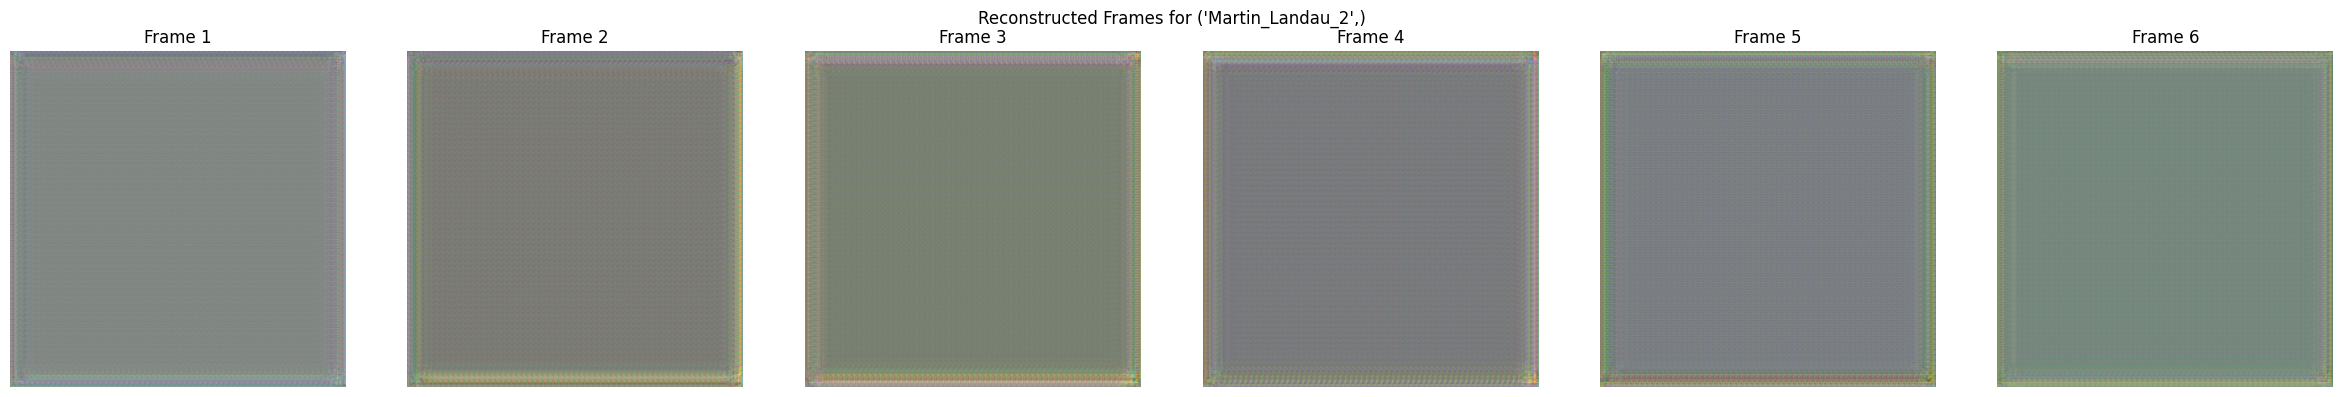

In [26]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device", device)

# Initialize the modules
in_channels = 64
preprocess_and_gsts = PreprocessAndGSTS(num_frames=5).to(device)
fem = model = FeatureExtractionModule2D(in_channels=3, base_channels=6).to(device).to(device)
feature_channels = [32, 64, 128, 256, 512]
output_channels = 64  # You can adjust this based on your needs -> reduced to 64
attention_fusion = AttentionFusion(output_channels=64).to(device)
enhancement_module = AdvancedEnhancementModule(in_channels=in_channels).to(device)
fusion_module = EnhancedFusionModule(in_channels=in_channels, mid_channels=64, out_channels=64).to(device)
facial_reconstruction_module = OptimizedFacialReconstructionModule(in_channels=64, out_channels=3).to(device)

import torch
import matplotlib.pyplot as plt
import torch
import numpy as np

def show_frames(frames, title):
    """
    Display a grid of frames from a video.
    
    Args:
    frames (torch.Tensor): Tensor of shape [B, C, T, H, W] or [C, T, H, W]
    title (str): Title for the plot
    """
    # Detach from computation graph and move to CPU
    frames = frames.detach().cpu()
    
    # Squeeze out the batch dimension if it's 1
    if frames.ndim == 5 and frames.shape[0] == 1:
        frames = frames.squeeze(0)
    
    # Ensure we're working with [C, T, H, W]
    assert frames.ndim == 4, "Expected 4D tensor of shape [C, T, H, W]"
    
    # Move time dimension to the front
    frames = frames.permute(1, 2, 3, 0)  # [T, H, W, C]
    
    # Convert to numpy and ensure values are in [0, 1]
#     frames = frames.numpy()
#     if frames.max() > 1.0:
#         frames = frames / 255.0
    frames = (frames - frames.min()) / (frames.max() - frames.min())
    
    # Set up the plot
    num_frames = frames.shape[0]
    fig, axes = plt.subplots(1, num_frames, figsize=(4*num_frames, 4))
    if num_frames == 1:
        axes = [axes]
    
    for i, ax in enumerate(axes):
        ax.imshow(frames[i])
        ax.axis('off')
        ax.set_title(f'Frame {i+1}')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    
def print_memory_status(step_name):
    allocated = torch.cuda.memory_allocated() / (1024 ** 3)  # Convert to GB
    reserved = torch.cuda.memory_reserved() / (1024 ** 3)  # Convert to GB
    print(f"{step_name} - Allocated: {allocated:.4f} GB, Reserved: {reserved:.4f} GB")

# Assuming 'dataloader' is defined and provides the actual dataset
for batch_idx, (frames, video_id) in enumerate(dataloader):
    # Move the frames to the device (assuming frames are of shape [B, C, T, H, W])
    frames = frames.to(device)
    print_memory_status("After loading frames")

    #1. Pre and GSTS
    processed_frames = preprocess_and_gsts(frames)
    print_memory_status("After Preprocess and GSTS")
    diagnose_frames(processed_frames, "After Preprocess and GSTS")
    
    #2. Extract Features
    features = fem(processed_frames)
    print_memory_status("After Feature Extraction")
    diagnose_frames(features, "After Feature Extraction")

    #3. Attention Fusion of feature maps
    fused_features = attention_fusion(features)
    print_memory_status("After Attention Fusion")
    diagnose_frames(fused_features, "After Attention Fusion")

    #4. Apply the enhancement module to get the low-light, deblurred, and super-resolved features
    low_light, deblurred, super_res = enhancement_module(fused_features)
    print_memory_status("After Enhancement Module")
    diagnose_frames(fused_features, "After Enhancement Module")

    #5. Fuse the enhanced features using the fusion module
    fused_features = fusion_module(deblurred, low_light, super_res)
    print_memory_status("After Fusion Module")
    diagnose_frames(fused_features, "Fusion Module")
    

    #6. Reconstruct the final frames using the facial reconstruction module
    reconstructed_frames = facial_reconstruction_module(fused_features)
    print_memory_status("After Facial Reconstruction")
    diagnose_frames(reconstructed_frames, "After Facial Reconstruction")

    # Print out the shapes to ensure everything is correct
    print(f"Batch {batch_idx}:")
    print(f"Input frames shape: {frames.shape}")
    print(f"Pre and GSTS shape: {processed_frames.shape}")
    #diagnose_frames(processed_frames, "After Preprocess and GSTS")
    # diagnose_frames(features, "After Feature Extraction")
    # diagnose_frames(fused_features, "After Attention Fusion")
    # diagnose_frames(reconstructed_frames, "After Facial Reconstruction")
    print(f"Low-light enhanced features shape: {low_light.shape}")
    print(f"Deblurred features shape: {deblurred.shape}")
    print(f"Super-resolved features shape: {super_res.shape}")
    print(f"Fused features shape: {fused_features.shape}")
    print(f"Reconstructed frames shape: {reconstructed_frames.shape}")
    
    # Here, you could save or visualize the output if necessary.
    show_frames(reconstructed_frames, f"Reconstructed Frames for {video_id}")
    
    # Break after one batch if only testing the loop; remove this to run through the entire dataset
    break

In [27]:
#CLEAN THE MEMORY AFTER EVERY BATCH -> FACTORY RESETING THE KERNEL IS HELPING MANAGE MEMORY